In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

To get started, lets plot a very basic graph:

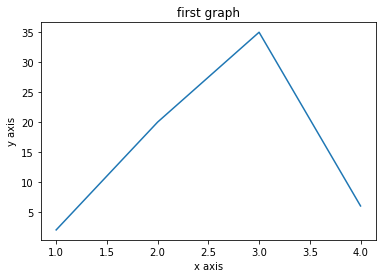

In [2]:
x = [1, 2, 3, 4]
y = [2, 20, 35, 6]
plt.plot(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('first graph')
plt.show()

There’s 2 essential components to Matplotlib.

Figure - this is the overall window that the entire thing is depicted on. 
This includes graphs, legends, and titles.

Axes - this is where the actual data is plotted - the actual graphs. 
These can be plotted with functions, such as plot(), scatter() and bar(). 
A Figure can contain multiple Axes.

## Types Of Plots
There are many types of plots you can use depending on the type of data and how you want to display it. Here are some basic ones:

Line plot - plot() - the graph we made above is a line plot
Histograms - hist() very useful for observing frequencies and probability distributions
Bar chart - bar() good for comparisons, categorical data
Pie chart - pie() good for expression part-to-whole relationships
Scatter plot - scatter() good for seeing correlations in data
Additionally you can add titles to the graph and to the x and y axis as shown above. If you have more than 1 plot, it makes sense to add a legend with legend() to know which plot is which.

At the very end we call plt.show() to display the figure to the notebook.

Load Iris dataset

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

Here we can see the different lengths in (cm) of each flower. 
notice the "r--" argument. This is a format string, which gives the options to style and color the plots.

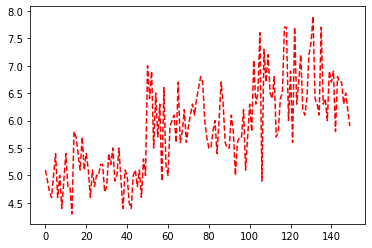

In [7]:
plt.plot(data["sepal_length"], "r--") 
plt.xlabel('flower ID')
plt.ylabel('sepal_length (cm)')
plt.show()

Now lets see a scatter plot of the lengths of the sepal and the petal.

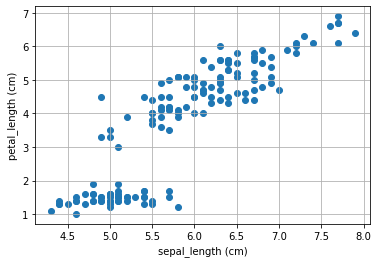

In [6]:
plt.scatter(data['sepal_length'], data['petal_length'])
plt.xlabel('sepal_length (cm)')
plt.ylabel('petal_length (cm)')
plt.grid() 

We can see a histogram of the petal length of one of the flowers.

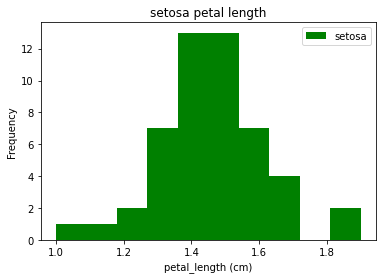

In [11]:
plt.hist(data[data.species == 'setosa']['petal_length'], color='g', label = 'setosa')
plt.xlabel('petal_length (cm)')
plt.ylabel('Frequency')
plt.title('setosa petal length')
plt.legend()

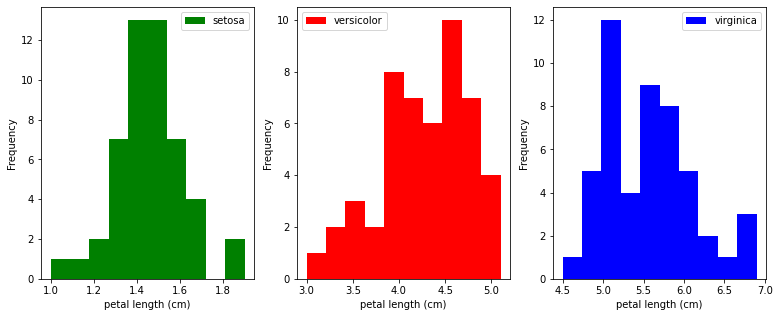

In [10]:
setosa_data = data[data.species == 'setosa']
versicolor_data = data[data.species == 'versicolor']
virginica_data = data[data.species == 'virginica']

fig, ax=plt.subplots(1,3,figsize=(13, 5))


ax[0].hist(setosa_data.petal_length, color='g', label = 'setosa')
ax[1].hist(versicolor_data.petal_length, color='r', label = 'versicolor')
ax[2].hist(virginica_data.petal_length, color='b', label = 'virginica')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')
ax[0].set_xlabel('petal length (cm)')
ax[1].set_xlabel('petal length (cm)')
ax[2].set_xlabel('petal length (cm)')

plt.show()

## Exercise

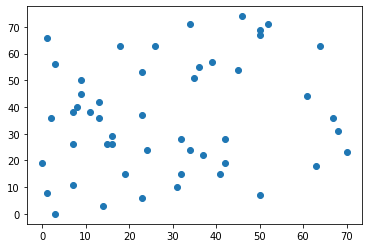

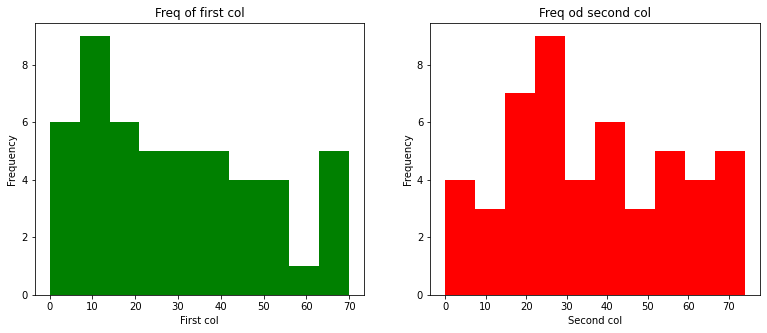

In [21]:
#create array of random 100 no between 0 to 75
arr=np.random.randint(low=0,high=75, size=100)
arr
# reshape 50x2
arr=arr.reshape((50,2))
#scatter plot of x,y 
plt.scatter(arr[:,0],arr[:,1])
# hist plot of each col
fig, ax=plt.subplots(1,2,figsize=(13, 5))
ax[0].hist(arr[:,0], color='g')
ax[1].hist(arr[:,1], color='r')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[0].set_xlabel('First col')
ax[1].set_xlabel('Second col')
ax[0].set_title('Freq of first col')
ax[1].set_title('Freq od second col')

plt.show()


### DS - features and types

In Data Science lingo, the column names are also called features.
There are different types of features in every dataset:

Continuous features: numeric variables that have an infinite number of values between any two values 
    such as age, weight, price etc.
Categorical variables: represent types of data which may be divided into groups. It can be divided further:
Nominal: assigns names to each data point without placing it in some sort of order such as different baseball teams. 
    One is not better than the other.
Ordinal: Involves some order. They stand in relation to each other in a ranked fashion. 
    For example in a survey: “Great”, “Good”, “Poor” is an ordinal feature.
    
Bar charts and pie charts are great for categorical features. 
Box plots and distributions are good for continuous features.

Titanic dataset
In the Titanic dataset case, the business problem is predicting who survived. So, the dependent feature (AKA the target feature) is Survived and that is what our data exploration should revolve around.
A great example of this is looking at the percentage of each gender who did not survive.

In [22]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
male_data=titanic_df[titanic_df.Sex=='male'].Survived.value_counts(normalize=True) #normalize = True (% not no)
female_data=titanic_df[titanic_df.Sex=='female'].Survived.value_counts(normalize=True)
male_data

0    0.811092
1    0.188908
Name: Survived, dtype: float64

DataFrame’s value_counts to find out how many passengers survived. normalize=True makes it a percentage. 
We then plotted them onto pie charts by making a subplot of 2 plots. 
We plotted the data and then the labels. 
.index.map() takes the index from the result of value_counts (which is 0 and 1) and maps it into more descriptive labels. autopct tells the pie chart how many decimal places the percentage should be.

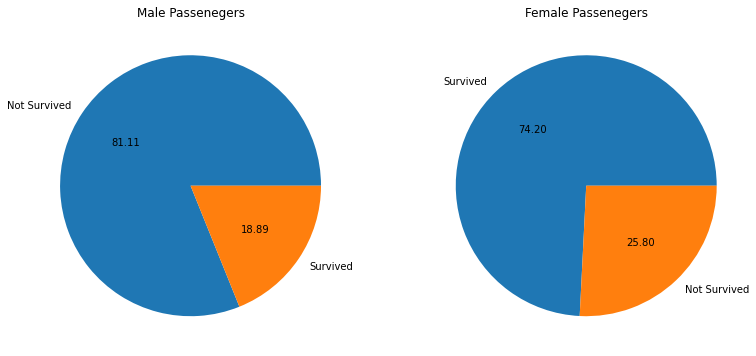

In [45]:
fig, ax=plt.subplots(1,2,figsize=(13, 6))
ax[0].pie(male_data,labels=male_data.index.map({0:"Not Survived",1:"Survived"}),autopct='%.2f',)
ax[0].set_title('Male Passenegers')
ax[1].pie(female_data,labels=female_data.index.map({0:"Not Survived",1:"Survived"}),autopct='%.2f',)
ax[1].set_title('Female Passenegers')
plt.show()

### Plot From Pandas Directly

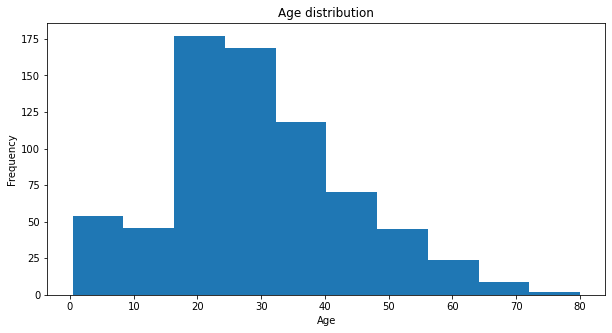

In [26]:
plt.figure(figsize= (10,5))
titanic_df.Age.plot(kind="hist")
plt.xlabel('Age')
plt.title('Age distribution')
plt.show()

In this case, we can see in this distribution that a majority of the passengers were young people.

KDE = KERNEL DENSITY ESTIMATION
visualizing the Probability Density of a continuous variable


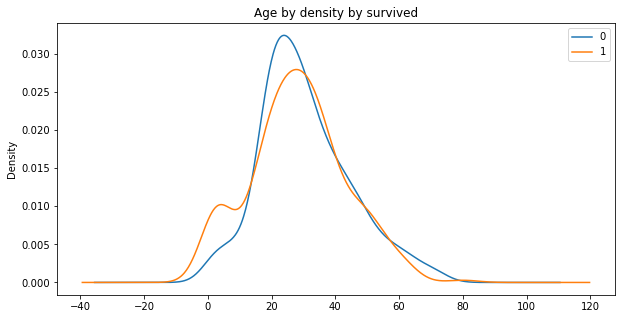

In [27]:
titanic_df.groupby('Survived')["Age"].plot(kind='kde', figsize=(10, 5))
plt.legend()
plt.title('Age by density by survived')
plt.show()

And again we can split it up among those who survived and those who didn’t using pandas groupby
There is not much of noticeable difference in age.

Typically in an analysis it’s a good idea to plot as many features with the target feature as possible. 
In this case, we can plot the rest of the continuous features against the target in the same distribution. 
To prevent messy code, this is can be done simply by using a for loop:

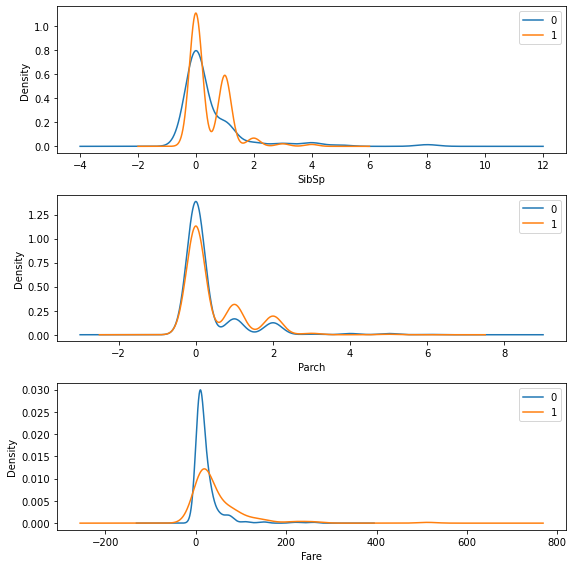

In [28]:
continuous_features = ['SibSp', 'Parch', 'Fare']
target = 'Survived'
fig, ax = plt.subplots(3,1,figsize=(8, 8))
for i, cont_v in enumerate(continuous_features):
    titanic_df.groupby(target)[cont_v].plot(kind='kde', ax=ax[i])
    ax[i].set_xlabel(cont_v)
    ax[i].legend()

fig.tight_layout()
plt.show()

Very similar to the one before except now we use subplots. 
We can pass in the correct Axes to pandas’ plot() function. fig.tight_layout() tells 
the entire Figure to automatically add and adjust padding between subplots so there’s no overlap between labels.

We might not get meaningful data on every plot. 
Here we see that in the fare, the mean is much higher in those who survived. 

## Saving Plots

Saving a figure is very simple. After creating the Figure and adding everything you want, at the end of the code you simply call the .savefig() method. The first argument requires the filename to be specifed. Usually it’s a png or pdf. For example plt.savefig('my_plot.png') There are other arguments as well which you can research. bbox_inches='tight' is useful one that removes undesirable whitespace around the image.

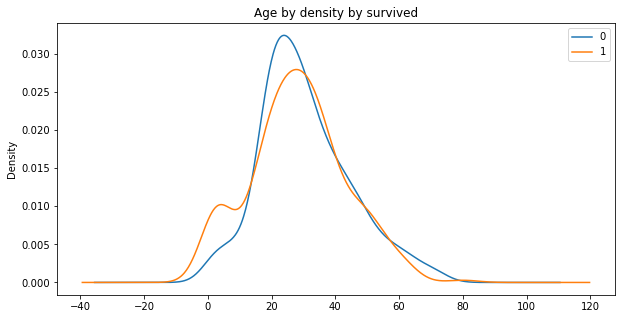

<Figure size 432x288 with 0 Axes>

In [29]:
titanic_df.groupby('Survived')["Age"].plot(kind='kde', figsize=(10, 5))
plt.legend()
plt.title('Age by density by survived')
plt.show()
plt.savefig('my_plot.png')

## Exercise

<AxesSubplot:ylabel='Frequency'>

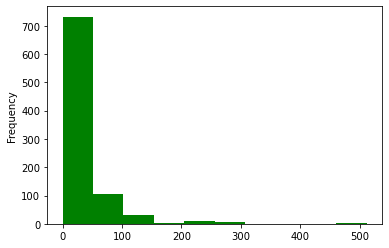

In [31]:
# hist of fare green color
titanic_df.Fare.plot(kind='hist',color='g')

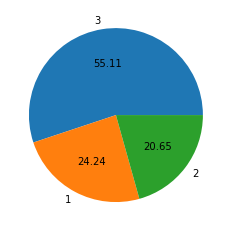

In [47]:
# pie plot of pclass
pclass=titanic_df.Pclass.value_counts(normalize=True) 
plt.pie(pclass,labels=pclass.index,autopct='%.2f')
plt.show()

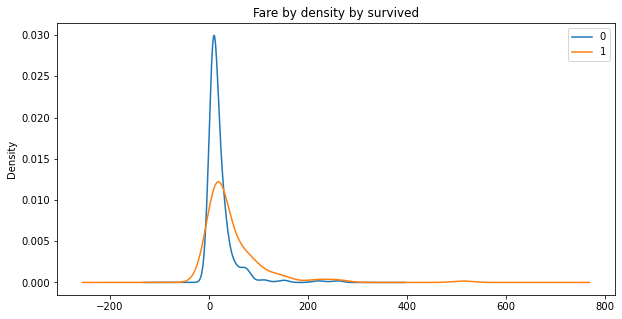

<Figure size 432x288 with 0 Axes>

In [49]:
# fare by survived
titanic_df.groupby('Survived')["Fare"].plot(kind='kde', figsize=(10, 5))
plt.legend()
plt.title('Fare by density by survived')
plt.show()
plt.savefig('fare_survived.png')